In [ ]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='8a1c4c9d-7b72-403a-819b-009104be5bcd', project_access_token='p-33a9fd738b694f965a83bfaa239d9eb4ec4e6570')
pc = project.project_context


In [ ]:
# Insira seu project token aqui

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [1]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in d:\program_files\anaconda3\lib\site-packages (0.23.2)


In [2]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in d:\program_files\anaconda3\lib\site-packages (1.2.0)


In [3]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in d:\program_files\anaconda3\lib\site-packages (0.0)


In [4]:
#ocultando mensagens de warning
import warnings
warnings.filterwarnings("ignore")

<hr>

## Download dos conjuntos de dados em formato .csv

In [6]:
import pandas as pd

In [7]:
df_data_1 = pd.read_csv('data/captura.csv')
df_data_1.tail()

2018-4-14  Fradique Coutinho  -23.5661  -46.6841   34448  18  65   6  \
90102  2018-10-26  Fradique Coutinho  -23.5661  -46.6841   36425  69  26  65   
90103  2018-10-30  Fradique Coutinho  -23.5661  -46.6841   36536  37  65  32   
90104   2018-11-3  Fradique Coutinho  -23.5661  -46.6841   35253  10  50  14   
90105   2018-5-15                Luz  -23.5365  -46.6332  126846  29  27  50   
90106  2018-11-24  Fradique Coutinho  -23.5661  -46.6841   36845  65  43  41   

       10  15  27  18.1  19       NORMAL  10184  
90102  21  35  23    26  25       NORMAL  10376  
90103  11  23  17     4  10  REABASTECER  10380  
90104  43  14  10    39  40  REABASTECER  10383  
90105  23  18  22    14  18       NORMAL  10935  
90106   8  12  38    43  36       NORMAL  10404

In [8]:
df_data_1.columns = (['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação','Original_473', 
                                                        'Original_269', 'Zero','Maçã-Verde', 'Tangerina' , 'Citrus', 
                                                        'Açaí-Guaraná', 'Pêssego',  'TARGET', 'row'])
df_data_1.tail()

Tempo            Estação      LAT     LONG  Movimentação  \
90102  2018-10-26  Fradique Coutinho -23.5661 -46.6841         36425   
90103  2018-10-30  Fradique Coutinho -23.5661 -46.6841         36536   
90104   2018-11-3  Fradique Coutinho -23.5661 -46.6841         35253   
90105   2018-5-15                Luz -23.5365 -46.6332        126846   
90106  2018-11-24  Fradique Coutinho -23.5661 -46.6841         36845   

       Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
90102            69            26    65          21         35      23   
90103            37            65    32          11         23      17   
90104            10            50    14          43         14      10   
90105            29            27    50          23         18      22   
90106            65            43    41           8         12      38   

       Açaí-Guaraná  Pêssego       TARGET    row  
90102            26       25       NORMAL  10376  
90103             4       10  REABASTECER  10380  
90104            39       40  REABASTECER  10383  
90105            14       18       NORMAL  10935  
90106            43       36       NORMAL  10404

In [9]:
df_training_dataset = df_data_1
df_training_dataset.tail()

Tempo            Estação      LAT     LONG  Movimentação  \
90102  2018-10-26  Fradique Coutinho -23.5661 -46.6841         36425   
90103  2018-10-30  Fradique Coutinho -23.5661 -46.6841         36536   
90104   2018-11-3  Fradique Coutinho -23.5661 -46.6841         35253   
90105   2018-5-15                Luz -23.5365 -46.6332        126846   
90106  2018-11-24  Fradique Coutinho -23.5661 -46.6841         36845   

       Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
90102            69            26    65          21         35      23   
90103            37            65    32          11         23      17   
90104            10            50    14          43         14      10   
90105            29            27    50          23         18      22   
90106            65            43    41           8         12      38   

       Açaí-Guaraná  Pêssego       TARGET    row  
90102            26       25       NORMAL  10376  
90103             4       10  REABASTECER  10380  
90104            39       40  REABASTECER  10383  
90105            14       18       NORMAL  10935  
90106            43       36       NORMAL  10404

In [10]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90107 entries, 0 to 90106
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tempo         90107 non-null  object 
 1   Estação       90107 non-null  object 
 2   LAT           90107 non-null  float64
 3   LONG          90107 non-null  float64
 4   Movimentação  90107 non-null  int64  
 5   Original_473  90107 non-null  int64  
 6   Original_269  90107 non-null  int64  
 7   Zero          90107 non-null  int64  
 8   Maçã-Verde    90107 non-null  int64  
 9   Tangerina     90107 non-null  int64  
 10  Citrus        90107 non-null  int64  
 11  Açaí-Guaraná  90107 non-null  int64  
 12  Pêssego       90107 non-null  int64  
 13  TARGET        90107 non-null  object 
 14  row           90107 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 10.3+ MB


In [11]:
df_training_dataset.nunique()

Tempo             720
Estação            25
LAT                25
LONG               25
Movimentação    14823
Original_473       81
Original_269       65
Zero               63
Maçã-Verde         43
Tangerina          42
Citrus             43
Açaí-Guaraná       42
Pêssego            42
TARGET              2
row             16950
dtype: int64

In [12]:
df_training_dataset.describe()

LAT          LONG   Movimentação  Original_473  Original_269  \
count  90107.000000  90107.000000   90107.000000  90107.000000  90107.000000   
mean     -23.572859    -46.652295   67428.735015     46.870188     36.043859   
std        0.026454      0.033103   43948.936644     25.556433     18.710011   
min      -23.626300    -46.725200   13592.000000      0.000000      0.000000   
25%      -23.589500    -46.682300   33114.000000     25.000000     20.000000   
50%      -23.566400    -46.648200   63952.000000     47.000000     36.000000   
75%      -23.550000    -46.634600   89708.500000     69.000000     52.000000   
max      -23.536500    -46.576500  195294.000000     86.000000     65.000000   

               Zero    Maçã-Verde     Tangerina        Citrus  Açaí-Guaraná  \
count  90107.000000  90107.000000  90107.000000  90107.000000  90107.000000   
mean      35.665065     24.351171     23.954432     24.474336     23.862663   
std       19.097151     12.097897     12.315477     12.069657     12.355622   
min        0.000000      1.000000      1.000000      1.000000      1.000000   
25%       19.000000     14.000000     13.000000     14.000000     13.000000   
50%       36.000000     24.000000     24.000000     25.000000     24.000000   
75%       52.000000     35.000000     35.000000     35.000000     35.000000   
max       65.000000     43.000000     43.000000     43.000000     43.000000   

            Pêssego           row  
count  90107.000000  90107.000000  
mean      23.883017   8522.240980  
std       12.291116   4945.672603  
min        1.000000      1.000000  
25%       13.000000   4214.000000  
50%       24.000000   8523.000000  
75%       35.000000  12841.500000  
max       43.000000  17016.000000

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [13]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='most_frequent',
    fill_value=0,
    verbose=0,
    copy=True
)

In [14]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
row             0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [16]:
df_training_dataset_imputed.tail()

Tempo            Estação      LAT     LONG  Movimentação  \
90102  2018-10-26  Fradique Coutinho -23.5661 -46.6841         36425   
90103  2018-10-30  Fradique Coutinho -23.5661 -46.6841         36536   
90104   2018-11-3  Fradique Coutinho -23.5661 -46.6841         35253   
90105   2018-5-15                Luz -23.5365 -46.6332        126846   
90106  2018-11-24  Fradique Coutinho -23.5661 -46.6841         36845   

       Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
90102            69            26    65          21         35      23   
90103            37            65    32          11         23      17   
90104            10            50    14          43         14      10   
90105            29            27    50          23         18      22   
90106            65            43    41           8         12      38   

       Açaí-Guaraná  Pêssego       TARGET    row  
90102            26       25       NORMAL  10376  
90103             4       10  REABASTECER  10380  
90104            39       40  REABASTECER  10383  
90105            14       18       NORMAL  10935  
90106            43       36       NORMAL  10404

In [17]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=[ 'Tempo', 'LAT', 'LONG', 'Movimentação', 'Estação', 'row'], inplace=False)

In [18]:
df_training_dataset_rmcolumns.tail()

Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
90102            69            26    65          21         35      23   
90103            37            65    32          11         23      17   
90104            10            50    14          43         14      10   
90105            29            27    50          23         18      22   
90106            65            43    41           8         12      38   

       Açaí-Guaraná  Pêssego       TARGET  
90102            26       25       NORMAL  
90103             4       10  REABASTECER  
90104            39       40  REABASTECER  
90105            14       18       NORMAL  
90106            43       36       NORMAL

# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [19]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
#df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Estação'])
df_training = df_training_dataset_rmcolumns
df_training.tail()

Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
90102            69            26    65          21         35      23   
90103            37            65    32          11         23      17   
90104            10            50    14          43         14      10   
90105            29            27    50          23         18      22   
90106            65            43    41           8         12      38   

       Açaí-Guaraná  Pêssego       TARGET  
90102            26       25       NORMAL  
90103             4       10  REABASTECER  
90104            39       40  REABASTECER  
90105            14       18       NORMAL  
90106            43       36       NORMAL

# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [20]:
df_training.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TARGET'],
      dtype='object')

In [21]:
features = df_training[
    [
        
    'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
    
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [88]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=133)

## Escolhendo o melhor modelo

In [23]:
# Import dos módulos
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
#from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


# Carregando features e Target
X = features
Y = target

# Definindo os valores para o número de folds
num_folds = 5
seed = 7


# Preparando a lista de modelos
modelos = []
#modelos.append(('LR', LogisticRegression()))
#modelos.append(('LDA', LinearDiscriminantAnalysis()))
#modelos.append(('SVM', SVC()))
#modelos.append(('NB', GaussianNB()))
#modelos.append(('KNN', KNeighborsClassifier()))

modelos.append(('RanF', RandomForestClassifier(bootstrap=False, max_depth=30, max_features='log2',
                        min_samples_split=10, min_weight_fraction_leaf=0,
                        n_estimators=50, warm_start=True)))

#modelos.append(('SGD', SGDClassifier()))
#modelos.append(('ExtraTree', ExtraTreesClassifier()))
#modelos.append(('GBoost', GradientBoostingClassifier()))
#modelos.append(('AdaBoost', AdaBoostClassifier()))
#modelos.append(('DesTree', DecisionTreeClassifier()))
modelos.append(('MLP', MLPClassifier(hidden_layer_sizes=(50,50 ), activation='logistic', solver='adam', alpha=0.0001)))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)


# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()


RanF: 0.998812 (0.001017)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



### Escolhendo os melhores parâmetros do modelo acima selecionado

In [ ]:
# Import dos módulos

import numpy as np
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Separando o array em componentes de input e output
X = features
Y = target

# Definindo os valores que serão testados
valores_grid = {'n_estimators' :(2,5,7,10,50), 'criterion':('gini','entropy'), 'max_depth':(3,5,10,15,25,30),
                'min_samples_split':(2,4,7,10), 'min_weight_fraction_leaf': (0, 0.1, 0.001,0.05, 0.5), 
                'max_features':('auto', 'sqrt', 'log2'), 'bootstrap': (True,False),   
                'warm_start':(False, True), }
seed = 7

# Criando o modelo
modelo = RandomForestClassifier()
iterations = 200
rsearch = MLPClassifier(hidden_layer_sizes=(50,50 ), activation='logistic', solver='adam', alpha=0.0001)))
rsearch.fit(X, Y)

# Print do resultado
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

### Treinando um modelo de aprendizado supervisionado

In [93]:
# Método para criar ensemble com Gradiente boosting Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

dtc = MLPClassifier(hidden_layer_sizes=(100,200,300,200,100),activation='relu', solver='adam',
                    alpha=0.0001, max_iter=500).fit(X_train, y_train)


#dtc = RandomForestClassifier(bootstrap=False, max_depth=30, max_features='log2',
                       #min_samples_split=10, min_weight_fraction_leaf=0,
                       #n_estimators=50, warm_start=True).fit(X_train, y_train)

### Fazendo previsões na amostra de teste

In [94]:
y_pred = dtc.predict(X_test)
print(y_pred)

['NORMAL' 'REABASTECER' 'REABASTECER' ... 'REABASTECER' 'NORMAL' 'NORMAL']


### Analisando a qualidade do modelo através da matriz de confusão

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

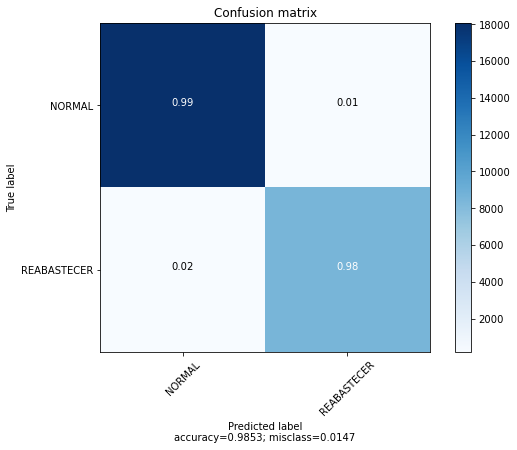

In [96]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [97]:
#!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv('./data/to_be_scored.csv')
df_to_be_scored.tail()

Tempo             Estação      LAT     LONG  Movimentação  \
979  2019-8-19  Hospital São Paulo -23.5984 -46.6455         26787   
980  2019-8-20  Hospital São Paulo -23.5984 -46.6455         26629   
981  2019-8-21  Hospital São Paulo -23.5984 -46.6455         27517   
982  2019-8-22  Hospital São Paulo -23.5984 -46.6455         26860   
983  2019-8-23  Hospital São Paulo -23.5984 -46.6455         24571   

     Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
979            34            65    28          17         33      27   
980            21            60    18          15         27      22   
981             9            56    13          14         21      17   
982            86            49     7          14         17      12   
983            74            41    65           8         14       7   

     Açaí-Guaraná  Pêssego  
979             6        2  
980            43       43  
981            37       37  
982            33       33  
983            27       27

# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [98]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tempo         984 non-null    object 
 1   Estação       984 non-null    object 
 2   LAT           984 non-null    float64
 3   LONG          984 non-null    float64
 4   Movimentação  984 non-null    int64  
 5   Original_473  984 non-null    int64  
 6   Original_269  984 non-null    int64  
 7   Zero          984 non-null    int64  
 8   Maçã-Verde    984 non-null    int64  
 9   Tangerina     984 non-null    int64  
 10  Citrus        984 non-null    int64  
 11  Açaí-Guaraná  984 non-null    int64  
 12  Pêssego       984 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 100.1+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [99]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'LAT', 'LONG', 'Movimentação', 'Estação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
979            34            65    28          17         33      27   
980            21            60    18          15         27      22   
981             9            56    13          14         21      17   
982            86            49     7          14         17      12   
983            74            41    65           8         14       7   

     Açaí-Guaraná  Pêssego  
979             6        2  
980            43       43  
981            37       37  
982            33       33  
983            27       27

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [101]:
df_training[
    [
         'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

In [102]:
df_to_be_scored_4.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [103]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

Original_473  Original_269  Zero  Maçã-Verde  Tangerina  Citrus  \
979            34            65    28          17         33      27   
980            21            60    18          15         27      22   
981             9            56    13          14         21      17   
982            86            49     7          14         17      12   
983            74            41    65           8         14       7   

     Açaí-Guaraná  Pêssego       TARGET  
979             6        2  REABASTECER  
980            43       43       NORMAL  
981            37       37  REABASTECER  
982            33       33  REABASTECER  
983            27       27       NORMAL

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [104]:
#project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

data=df_to_be_scored_4.to_csv("results.csv")

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
